In [2]:
from sklearn import svm
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from scipy.stats import zscore
from sklearn.metrics import f1_score,roc_curve, auc, confusion_matrix, ConfusionMatrixDisplay,precision_score,recall_score,roc_auc_score

from sklearn.model_selection import GridSearchCV

In [ ]:
#this cell is for large dateset, which is not applicable for this case. please run below cell
#same scaler method
import preprocessing

# preprocessing.split_external_data(df)
# undersample_data(df)
# rescale_dataset(df)
# remove_outliers(df)
# preprocess(df, save_csv = False)
df=pd.read_csv("sbcdata.csv")
  
# print(df.head())
print(df.dtypes)
# df_uml, df_umg = preprocessing.preprocess(df, save_csv = False)


# print('training set preprocessing confirmation')
# display(df_uml.Diagnosis.value_counts()) #make sure data is balance
# display(df_uml)

# print('validation set preprocessing confirmation')
# display(df_umg.Diagnosis.value_counts()) #make sure data is balance
# display(df_umg)

# y=df_umg['Diagnosis']
# x=df_umg[['Age','Sex','HGB','MCV','PLT','RBC','WBC',]]
# X_train, X_test, y_train, y_test = train_test_split(x, y,test_size=0.2, random_state=42)

# 创建SVM模型实例 model = svm.SVC(kernel='rbf', C=1.0, gamma='scale')
# model = svm.SVC(kernel='rbf', C=0.1, gamma='scale', class_weight='balanced')
# 训练模型
# model.fit(X_train, y_train)
# 在测试集上预测
# y_pred = model.predict(X_test)
# 评估模型
# print("Accuracy:", accuracy_score(y_test, y_pred))
# print("Classification Report:\n", classification_report(y_test, y_pred))

# param_grid = {'C': [0.1, 1, 10], 'gamma': [0.001, 0.01, 0.1]}
# grid = GridSearchCV(svm.SVC(), param_grid, cv=3)
# grid.fit(X_train, y_train)

# #optional 2
# y_pred2=grid.predict(X_test)
# f1 = f1_score(y_test, y_pred2)
# #f1 score for optiona 2
# f1 = f1_score(y_test, y_pred2)
# f1_macro = f1_score(y_test, y_pred2, average='macro')
# print("F1 Score (Macro Average):", f1_macro)

#f1 score
# f1 = f1_score(y_test, y_pred)
# f1_macro = f1_score(y_test, y_pred, average='macro')
# print("F1 Score:", f1_macro)


Id             int64
Age            int64
Sex           object
Diagnosis     object
Center        object
Set           object
Sender        object
Episode        int64
Time         float64
TargetIcu     object
SecToIcu     float64
CRP          float64
HGB          float64
MCV          float64
PCT          float64
PLT          float64
RBC          float64
WBC          float64
dtype: object


Accuracy: 0.7740492170022372
Precision: 0.86
Recall: 0.77
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.74      0.84       347
           1       0.50      0.89      0.64       100

    accuracy                           0.77       447
   macro avg       0.73      0.82      0.74       447
weighted avg       0.86      0.77      0.79       447

F1 Score: 0.7915263787118639
AUC: 0.815


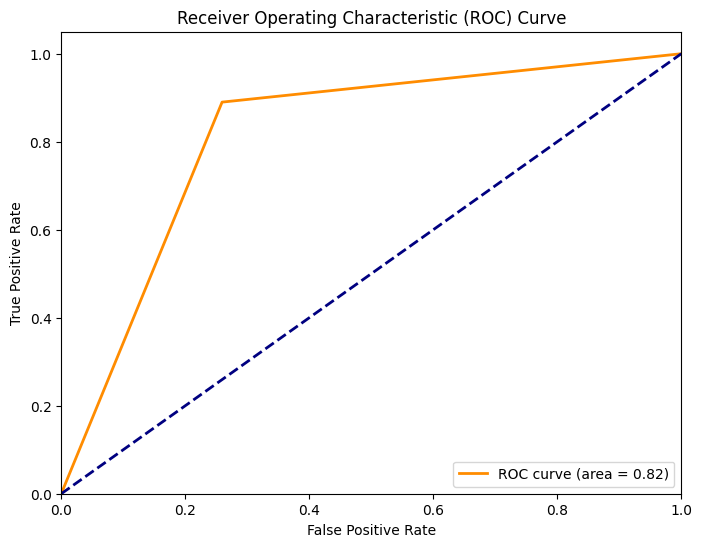

Confusion Matrix:
[[257  90]
 [ 11  89]]


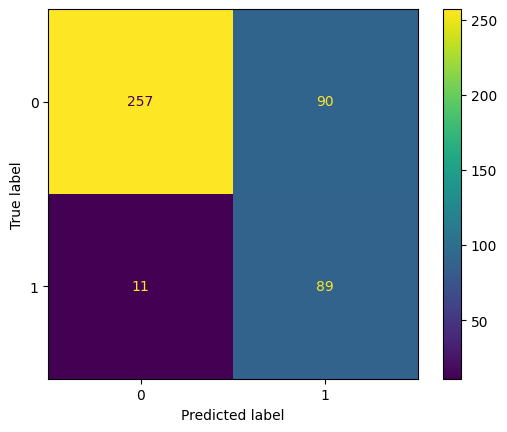

In [ ]:
#This is for a  small dataset, please run this one.
df=pd.read_csv("sbcdata_5000.csv")
df.drop(columns=['Id', 'Center','Set','Sender','Episode','Time','TargetIcu','SecToIcu','PCT'],inplace=True)
df=df[df['Diagnosis'] != 'SIRS']
# print(df.dtypes)
# print(df.shape)
# print(df.isna().sum())
#pint(df.head())
# we decide to drop CRP after
# df['CRP']=df['CRP'].fillna(df['CRP'].mean())
#missing drop
df.dropna(inplace=True)
df = df.drop_duplicates()
# print(df.isna().sum())
# encode, handle sex and diagnosis
label_encoder_sex = LabelEncoder()
df['Sex'] = label_encoder_sex.fit_transform(df['Sex'])  # Male -> 1, Female -> 0
label_encoder_diagnosis = LabelEncoder()
df['Diagnosis'] = label_encoder_diagnosis.fit_transform(df['Diagnosis'])  # Positive -> 1, Negative -> 0

#split data, columns SVM
y=df['Diagnosis']
x=df[['Age','Sex','CRP','HGB','MCV','PLT','RBC','WBC',]]
# print(x.head(),y.head())
X_train, X_test, y_train, y_test = train_test_split(x, y,test_size=0.2, random_state=42)

# Standardize numerical features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# use model = svm.SVC(kernel='rbf', C=1.0, gamma='scale')
model = svm.SVC(kernel='rbf', C=1.0, gamma='scale', class_weight='balanced',probability=True)
# train model
model.fit(X_train, y_train)
# test predict
y_pred = model.predict(X_test)
# evaulate model
print("Accuracy:", accuracy_score(y_test, y_pred))
precision = precision_score(y_test, y_pred,average='weighted')
print(f"Precision: {precision:.2f}")
recall = recall_score(y_test, y_pred,average='weighted')
print(f"Recall: {recall:.2f}")
print("Classification Report:\n", classification_report(y_test, y_pred))
#f1 score
# f1 = f1_score(y_test, y_pred)
f1_weighted = f1_score(y_test, y_pred, average='weighted')
print("F1 Score:", f1_weighted)

# Plot ROC curve
#calc ROC curve
# roc_auc_score(y_test, y_pred, multi_class='ovr', average='weighted')
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
# calc AUC
roc_auc = auc(fpr, tpr)
print(f"AUC: {roc_auc:.3f}")
# plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # 随机分类器的线
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

#confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
disp.plot()
